## 1. Project Title

Credit Risk Prediction for Home Credit Customers: Identifying Customers with Repayment or Non-Payment Potential.

### 1.1 Description

Home Credit Indonesia merupakan perusahaan pembiayaan berbasis teknologi dengan jangkauan mitra toko yang luas di lebih dari 200 kota di Indonesia. Telah beroperasi sejak 2013, Home Credit kini berkembang menjadi mitra finansial terpercaya bagi jutaan pelanggan kami. Home Credit turut mendorong keterbukaan akses terhadap layanan keuangan yang transparan dengan proses cepat dan mampu membantu masyarakat dalam memenuhi kebutuhan mereka secara terencana termasuk mengelola keuangan dan cicilan mereka dengan baik. [[1]]('https://www.homecredit.co.id/tentang-perusahaan')

Dalam industri keuangan, risiko kredit merupakan hal yang sangat penting. Lembaga keuangan Home Credit perlu memiliki pemahaman yang mendalam tentang potensi risiko kredit dari setiap pelanggan. Hal ini membantu dalam mengambil keputusan yang tepat terkait persetujuan pinjaman dan mengurangi risiko gagal bayar. Oleh karena itu, pengembangan model prediktif risiko kredit yang akurat dan handal menjadi sangat penting.

Tujuan dari penelitian ini adalah mengembangkan sebuah model prediktif risiko kredit yang dapat mengidentifikasi pelanggan Home Credit yang berpotensi melakukan pembayaran pinjaman secara tepat waktu atau tidak. Model ini menggunakan pendekatan analisis data dan teknik machine learning untuk menganalisis berbagai faktor terkait pelanggan seperti profil keuangan, riwayat kredit sebelumnya, dan faktor sosial-ekonomi. Dengan menggunakan model ini, Home Credit dapat melakukan penilaian risiko yang lebih baik, meningkatkan keputusan persetujuan pinjaman, dan mengoptimalkan portofolio pinjaman mereka.

Dengan demikian, penelitian ini bertujuan untuk meningkatkan efisiensi dan akurasi dalam menilai risiko kredit pelanggan Home Credit, sehingga dapat membantu mengoptimalkan proses persetujuan pinjaman dan mengurangi risiko gagal bayar.

### 1.2 Objective

Berdasarkan deskripsi diatas, makan tujuan dari analisis dan modeling ini adalah: <br>
1. Mengetahui Profile Pelanggan Home Credit yang akan Repayment dan Non Repayment
2. Mendapatkan model terbaik untuk memprediksi Pelanggan yang akan Repayment dan Non Repayment.

### 1.3 Problem Statement



1. Bagaimana mengetehui profile pelanggan home credit yang akan repayment dan non repayment?
2. Bagaimana cara menemukan model terbaik untuk memprediksi pelanggan yang akan repayment dan non repayment?

## 2. Introduction

### 2.1 Identity

Nama : **Iwan Kurniawan** <br>
Batch : **RMT - 019**

### 2.2 Dataset 

Dataset disediakan di situs [Kaggle]('https://www.kaggle.com/competitions/home-credit-default-risk') dalam bentuk beberapa file CSV. File dataset dijelaskan seperti yang terlihat pada Gambar 1.

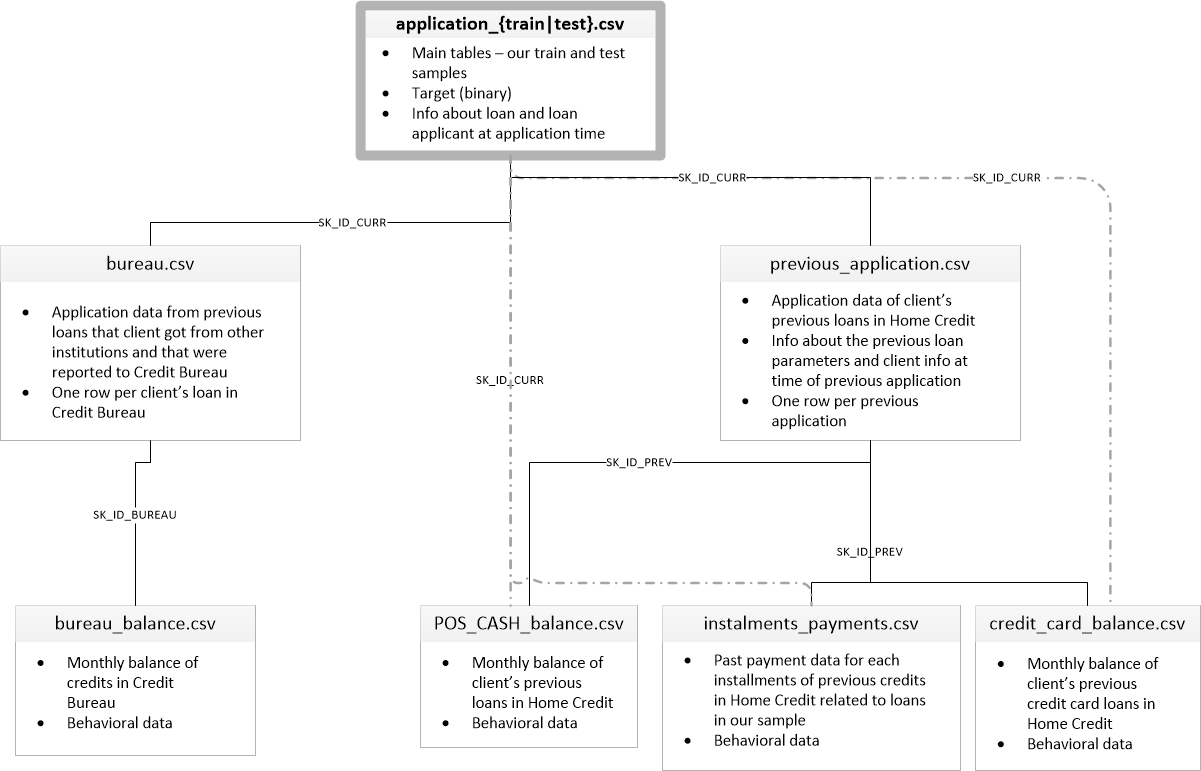

In [1]:
from IPython.display import Image
image_path = 'hc.png'
Image(filename=image_path)

1. `application_{train|test}.csv`: Ini adalah tabel utama yang terbagi menjadi dua Dataset untuk data latih (train) dan data uji (test). Dataset ini berisi data statis untuk aplikasi pinjaman, di mana setiap baris mewakili satu pinjaman. Dataset "train" juga mencakup variabel "TARGET" yang menunjukkan apakah pinjaman tersebut dibayar tepat waktu atau tidak.

2. `bureau.csv`: Dataset ini berisi informasi tentang riwayat kredit sebelumnya dari klien yang dilaporkan ke Credit Bureau oleh lembaga keuangan lain. Setiap pinjaman dalam tabel utama dapat memiliki beberapa baris dalam Dataset ini, yang mewakili jumlah kredit yang dimiliki klien sebelum tanggal aplikasi.

3. `bureau_balance.csv`: Dataset ini menyediakan informasi tentang saldo bulanan dari riwayat kredit sebelumnya klien yang dilaporkan ke Credit Bureau. Setiap baris dalam Dataset ini mewakili satu bulan dari riwayat kredit sebelumnya, sehingga terdapat beberapa baris untuk setiap pinjaman dalam tabel utama.

4. `POS_CASH_balance.csv`: Dataset ini berisi rekaman saldo bulanan dari pinjaman sebelumnya klien dengan Home Credit yang terkait dengan pinjaman dalam tabel utama. Dataset ini mencatat riwayat pinjaman sebelumnya, dengan setiap baris mewakili satu bulan dari riwayat untuk pinjaman tertentu dalam tabel utama.

5. `credit_card_balance.csv`: Dataset ini berisi rekaman saldo bulanan dari kartu kredit sebelumnya yang dimiliki klien dengan Home Credit. Mirip dengan Dataset sebelumnya, ini juga mencatat riwayat kartu kredit sebelumnya untuk setiap pinjaman dalam tabel utama.

6. `previous_application.csv`: Dataset ini berisi informasi tentang semua aplikasi pinjaman sebelumnya yang diajukan oleh klien yang memiliki pinjaman dalam tabel utama. Setiap baris dalam Dataset ini mewakili aplikasi pinjaman sebelumnya yang terkait dengan pinjaman dalam dataset.

7. `installments_payments.csv`: Dataset ini menyediakan riwayat pembayaran untuk kredit yang telah diberikan sebelumnya oleh Home Credit yang terkait dengan pinjaman dalam tabel utama. Dataset ini mencakup baris untuk setiap pembayaran yang dilakukan, serta baris untuk pembayaran yang terlambat.

8. `HomeCredit_columns_description.csv`: Dataset ini berisi deskripsi untuk kolom-kolom dalam berbagai Dataset data. Dataset ini dapat digunakan sebagai referensi untuk memahami arti setiap kolom dalam dataset.


## 3. External Link

Deployment : <br>

## 4. Package

Package yang di import adalah semua library yang terkait dengan kebutuhan saat EDA, Processing, Modeling dan Evaluation.

In [2]:
#library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

#prepocessing
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import PowerTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

#model
import xgboost as xgb
from sklearn.ensemble import HistGradientBoostingClassifier


#metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

#save model
import pickle

# Set plot style
sns.set(color_codes=True)

#setting pandas 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.1f}'.format)

## 5. Data Loading

Tahap ini merupakan proses persiapan data, menampilkan tipe data, cek missing values dan lainnya.

### Load Data

In [3]:
# load data 
app_test = pd.read_csv('./home-credit-default-risk/application_test.csv', encoding='latin-1')
app_train = pd.read_csv('./home-credit-default-risk/application_train.csv', encoding='latin-1')

# prev_app = pd.read_csv('./home-credit-default-risk/previous_application.csv', encoding='latin-1')
# bereau = pd.read_csv('./home-credit-default-risk/bureau.csv', encoding='latin-1')
# bereau_balance = pd.read_csv('./home-credit-default-risk/bureau_balance.csv', encoding='latin-1')
# cc_balance = pd.read_csv('./home-credit-default-risk/credit_card_balance.csv', encoding='latin-1')
# pos_cash_balance = pd.read_csv('./home-credit-default-risk/POS_CASH_balance.csv', encoding='latin-1')
# desc = pd.read_csv('./home-credit-default-risk/HomeCredit_columns_description.csv', encoding='latin-1')


In [4]:
#melihat jumlah baris dan kolom
print('Dataset application_train terdiri dari %d baris dan %d kolom\n' %app_train.shape)

Dataset application_train terdiri dari 307511 baris dan 122 kolom



In [5]:
#melihat jumlah baris dan kolom
print('Dataset application_test terdiri dari %d baris dan %d kolom\n' %app_test.shape)

Dataset application_test terdiri dari 48744 baris dan 121 kolom



In [6]:
#menampilkan 2 baris pertama application_train
app_train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.1,0.3,0.1,0.0,0.0,1.0,0.6,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,reg oper account,block of flats,0.0,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.0,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3,0.6,NaN,0.1,0.1,1.0,0.8,0.1,0.1,0.0,0.3,0.3,0.0,0.1,0.1,0.0,0.0,0.1,0.1,1.0,0.8,0.0,0.1,0.0,0.3,0.3,0.0,0.1,0.1,0.0,0.0,0.1,0.1,1.0,0.8,0.1,0.1,0.0,0.3,0.3,0.0,0.1,0.1,0.0,0.0,reg oper account,block of flats,0.1,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Cek Tipe Data

In [7]:
# Menampilkan informasi dasar tentang tipe data
app_train.info()
print('')
print('Dataframe application_train memiliki {} kolom dengan tipe {}, {} kolom dengan tipe {} dan {} kolom dengan tipe {}.'
    .format(app_train.dtypes.value_counts()[0],app_train.dtypes.value_counts().index[0],
            app_train.dtypes.value_counts()[1],app_train.dtypes.value_counts().index[1],
            app_train.dtypes.value_counts()[2],app_train.dtypes.value_counts().index[2]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

Dataframe application_train memiliki 65 kolom dengan tipe float64, 41 kolom dengan tipe int64 dan 16 kolom dengan tipe object.


In [8]:
# Menampilkan informasi dasar tentang tipe data
app_test.info()
print('')
print('Dataframe application_test memiliki {} kolom dengan tipe {}, {} kolom dengan tipe {} dan {} kolom dengan tipe {}.'
    .format(app_test.dtypes.value_counts()[0],app_test.dtypes.value_counts().index[0],
            app_test.dtypes.value_counts()[1],app_test.dtypes.value_counts().index[1],
            app_test.dtypes.value_counts()[2],app_test.dtypes.value_counts().index[2]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB

Dataframe application_test memiliki 65 kolom dengan tipe float64, 40 kolom dengan tipe int64 dan 16 kolom dengan tipe object.


## 6. Exploratory Data Analysis (EDA)


Pembersihan data berarti memperbaiki data yang buruk dalam kumpulan data.
Data yang buruk bisa berupa:

- *Missing Values*
- Data dalam format yang salah
- dll.

#### Missing Values

In [9]:
#melihat persentase data missing values
null = app_train.isnull().sum()/len(app_train)*100
null = null.sort_values(ascending=False).round(2)
print('Persentase Missing Values :\n', null.round(2))
print('')


Persentase Missing Values :
 COMMONAREA_MEDI                69.9
COMMONAREA_AVG                 69.9
COMMONAREA_MODE                69.9
NONLIVINGAPARTMENTS_MODE       69.4
NONLIVINGAPARTMENTS_AVG        69.4
NONLIVINGAPARTMENTS_MEDI       69.4
FONDKAPREMONT_MODE             68.4
LIVINGAPARTMENTS_MODE          68.3
LIVINGAPARTMENTS_AVG           68.3
LIVINGAPARTMENTS_MEDI          68.3
FLOORSMIN_AVG                  67.8
FLOORSMIN_MODE                 67.8
FLOORSMIN_MEDI                 67.8
YEARS_BUILD_MEDI               66.5
YEARS_BUILD_MODE               66.5
YEARS_BUILD_AVG                66.5
OWN_CAR_AGE                    66.0
LANDAREA_MEDI                  59.4
LANDAREA_MODE                  59.4
LANDAREA_AVG                   59.4
BASEMENTAREA_MEDI              58.5
BASEMENTAREA_AVG               58.5
BASEMENTAREA_MODE              58.5
EXT_SOURCE_1                   56.4
NONLIVINGAREA_MODE             55.2
NONLIVINGAREA_AVG              55.2
NONLIVINGAREA_MEDI             55.2

Terdapat missing pada beberapa feature yang > 30% dari total data.

In [10]:
#cek jumlah data kosong kolom Informasi Properti
missing_prop = app_train[app_train['COMMONAREA_MEDI'].isnull()] #membuat varible menampung data yg kosong
missing_prop_perc = len(missing_prop) / len(app_train) * 100 #menghitung persentase
print('Jumlah data properti yang kosong   : {} baris \nPersentase data kosong   : {:.2f}%'.format(len(missing_prop), missing_prop_perc))
print('')

#cek data kosong informasi properti berdasarkan Kepemilikan Properti
miss_type = missing_prop[['FLAG_OWN_REALTY']].value_counts() 
miss_perc = missing_prop[['FLAG_OWN_REALTY']].value_counts()/len(missing_prop)*100
print('')
print('Jumlah kosong berdasarkan kepemilikan properti :\n',miss_type)
print('')
print('Persentase (%) : \n',miss_perc.round(2))
print('')


Jumlah data properti yang kosong   : 214865 baris 
Persentase data kosong   : 69.87%


Jumlah kosong berdasarkan kepemilikan properti :
 FLAG_OWN_REALTY
Y                  147990
N                   66875
dtype: int64

Persentase (%) : 
 FLAG_OWN_REALTY
Y                 68.9
N                 31.1
dtype: float64



Data properti dengan tingkat missing yang tinggi (>60%) menunjukkan bahwa sebagian besar responden tidak memiliki informasi tentang kepemilikan properti mereka. 31% client memang tidak memiliki properti, yang dapat menjelaskan mengapa data ini hilang.

In [11]:
#cek jumlah data kosong kolom `OCCUPATION_TYPE`
missing_occ = app_train[app_train['OCCUPATION_TYPE'].isnull()] #membuat varible menampung data yg kosong
missing_occ_perc = len(missing_occ) / len(app_train) * 100 #menghitung persentase
print('Jumlah OCCUPATION_TYPE yang kosong  : {} baris \nPersentase data kosong   : {:.2f}%'.format(len(missing_occ), missing_occ_perc))
print('')

#cek data kosong informasi properti berdasarkan `NAME_INCOME_TYPE`
miss_type = missing_occ[['NAME_INCOME_TYPE']].value_counts() 
miss_perc = missing_occ[['NAME_INCOME_TYPE']].value_counts()/len(missing_occ)*100
print('')
print('Jumlah kosong berdasarkan NAME_INCOME_TYPE :\n',miss_type)
print('')
print('Persentase (%) : \n',miss_perc.round(2))

Jumlah OCCUPATION_TYPE yang kosong  : 96391 baris 
Persentase data kosong   : 31.35%


Jumlah kosong berdasarkan NAME_INCOME_TYPE :
 NAME_INCOME_TYPE    
Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
dtype: int64

Persentase (%) : 
 NAME_INCOME_TYPE    
Pensioner              57.4
Working                25.9
Commercial associate   12.8
State servant           3.9
Unemployed              0.0
Student                 0.0
Businessman             0.0
Maternity leave         0.0
dtype: float64


Kemungkinan besar data occupation yang hilang pada tingkat yang sangat tinggi (>31%) disebabkan oleh sebagian besar responden yang telah pensiun (57%).

In [12]:
#cek jumlah data kosong kolom `OWN_CAR_AGE`
missing_car = app_train[app_train['OWN_CAR_AGE'].isnull()] #membuat varible menampung data yg kosong
missing_car_perc = len(missing_car) / len(app_train) * 100 #menghitung persentase
print('Jumlah OWN_CAR_AGE yang kosong  : {} baris \nPersentase data kosong   : {:.2f}%'.format(len(missing_car), missing_car_perc))
print('')

#cek data kosong informasi properti berdasarkan `OWN_CAR_AGE`
miss_type = missing_car[['FLAG_OWN_CAR']].value_counts() 
miss_perc = missing_car[['FLAG_OWN_CAR']].value_counts()/len(missing_car)*100
print('')
print('Jumlah kosong berdasarkan FLAG_OWN_CAR :\n',miss_type)
print('')
print('Persentase (%) : \n',miss_perc.round(2))

Jumlah OWN_CAR_AGE yang kosong  : 202929 baris 
Persentase data kosong   : 65.99%


Jumlah kosong berdasarkan FLAG_OWN_CAR :
 FLAG_OWN_CAR
N               202924
Y                    5
dtype: int64

Persentase (%) : 
 FLAG_OWN_CAR
N              100.0
Y                0.0
dtype: float64


Analisis data menunjukkan bahwa terdapat sekitar 65,99% data yang kosong pada kolom 'OWN_CAR_AGE'. Jumlah data kosong mencapai 202.929 baris. Selanjutnya, setelah memeriksa kolom 'FLAG_OWN_CAR', ditemukan bahwa semua data kosong terkait dengan pelanggan yang tidak memiliki mobil, dengan 202.924 baris data kosong yang memiliki nilai 'N' dan hanya 5 baris data kosong yang memiliki nilai 'Y' (memiliki mobil).

Persentase kepemilikan mobil menunjukkan bahwa 100% data kosong terkait dengan kepemilikan mobil 'N' (tidak memiliki mobil), sementara kepemilikan mobil 'Y' (memiliki mobil) tidak memiliki data kosong, dengan persentase 0%.

Dengan demikian, dapat disimpulkan bahwa adanya data kosong pada kolom 'OWN_CAR_AGE' sangat terkait dengan kepemilikan mobil. Pelanggan yang tidak memiliki mobil lebih cenderung memiliki data kosong pada kolom ini, sedangkan pelanggan yang memiliki mobil tidak memiliki data kosong pada kolom tersebut.

In [13]:
data_type = app_train.columns.to_series().groupby(app_train.dtypes).groups
{k.name: v for k, v in data_type.items()}

{'int64': Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
        'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
        'FLAG_DOCUMENT_21'],
       dtype='object'),
 'float64': Index(['A

In [14]:
#list ordinal categoric
ordinals = ['NAME_EDUCATION_TYPE']

#list nominal categoric
nominals = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_TYPE_SUITE', 
            'NAME_INCOME_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
        'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE','HOUSETYPE_MODE', 
        'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_REALTY', 'WEEKDAY_APPR_PROCESS_START']

#list numeric
numerics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
        'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
        'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
        'CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'CNT_FAM_MEMBERS']

have_scaling = ['REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
                'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
                'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
                'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
                'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
                'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
                'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
                'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
                'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
                'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
                'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
                'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
                'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
                'TOTALAREA_MODE']

have_enc = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
        'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 
        'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
        'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
        'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
        'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
        'FLAG_DOCUMENT_21']

property_miss = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
                'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
                'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
                'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
                'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
                'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
                'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
                'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
                'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
                'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
                'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
                'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
                'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
                'TOTALAREA_MODE']

In [15]:
# Mengambil list kolom dengan tipe data int dan float
int_float_cols = app_train.select_dtypes(include=['int', 'float']).columns.tolist()

# Mengambil list kolom dengan tipe data object (string)
object_cols = app_train.select_dtypes(include=['object']).columns.tolist()


In [16]:
#statisik descriptive data personal
(app_train[int_float_cols].describe().T).round(2)

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.5,102790.2,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.4,0.7,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.9,237123.1,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599026.0,402490.8,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,27108.6,14493.7,1615.5,16524.0,24903.0,34596.0,258025.5
AMT_GOODS_PRICE,307233.0,538396.2,369446.5,40500.0,238500.0,450000.0,679500.0,4050000.0
REGION_POPULATION_RELATIVE,307511.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
DAYS_BIRTH,307511.0,-16037.0,4364.0,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307511.0,63815.1,141275.8,-17912.0,-2760.0,-1213.0,-289.0,365243.0


mayoritas pelanggan (90%) membayar kredit mereka tepat waktu, yang menunjukkan bahwa sebagian besar pelanggan memiliki keterampilan keuangan yang baik. Namun, sekitar 10% pelanggan mengalami keterlambatan pembayaran, yang perlu mendapat perhatian lebih lanjut.

Rata-rata jumlah anak yang dimiliki oleh pelanggan adalah 0.4, dengan sebagian besar pelanggan tidak memiliki anak. Hal ini menunjukkan bahwa mayoritas pelanggan Home Credit adalah individu atau pasangan tanpa tanggungan keluarga.

Pendapatan total pelanggan bervariasi secara signifikan, dengan rata-rata sekitar 168,797.9. Adanya variasi ini menunjukkan adanya kesenjangan pendapatan di antara pelanggan. Oleh karena itu, pemahaman yang mendalam tentang pendapatan pelanggan dapat membantu dalam penilaian risiko kredit dan penentuan jumlah kredit yang tepat.

Jumlah kredit yang diajukan oleh pelanggan juga bervariasi, dengan rata-rata sekitar 599,026.0. Hal ini menunjukkan bahwa pelanggan Home Credit memiliki kebutuhan keuangan yang beragam, mulai dari kebutuhan yang kecil hingga yang besar.

Harga barang yang dibeli dengan menggunakan kredit juga memiliki variasi yang signifikan, dengan rata-rata sekitar 538,396.2. Hal ini menunjukkan bahwa pelanggan Home Credit membeli barang dengan nilai yang berbeda-beda, mulai dari harga yang rendah hingga tinggi.

In [17]:
#statisik descriptive data personal
app_train[object_cols].describe(include=object).T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


Mayoritas pelanggan menggunakan kredit tunai (Cash loans) untuk pembelian rumah atau properti. Lebih banyak pelanggan perempuan (F) daripada laki-laki. Mayoritas pelanggan tidak memiliki mobil, namun sebagian besar memiliki rumah sendiri. Mayoritas pelanggan adalah pasangan yang menikah dan tinggal di rumah atau apartemen. Data pekerjaan hanya tersedia untuk sebagian pelanggan, dengan mayoritas adalah buruh. Aplikasi pelanggan didistribusikan merata sepanjang minggu, dengan puncaknya pada hari Selasa. Mayoritas pelanggan berasal dari tipe organisasi bisnis. Mode fondasi dan bahan dinding properti hanya diketahui untuk sebagian kecil pelanggan.

In [18]:
#Membuat kategori pada income
# Menentukan batas kategori
bins = [0, 50000, 100000, 150000, 200000, 250000, float('inf')]

# Menentukan label kategori
labels = ['< 50K', '50K - 100K', '100K - 150K', '150K - 200K', '200K - 250K', '>250K']

# Membuat kolom kategori baru berdasarkan AMT_INCOME_TOTAL
app_train['Income Category'] = pd.cut(app_train['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False)

### Fungsi Visualisasi

In [19]:
def visualize_data(dataframe, numerical_columns, categorical_columns):
    num_cols = len(numerical_columns)
    cat_cols = len(categorical_columns)
    nrows = (num_cols + cat_cols + 2) // 3  # Menghitung jumlah baris berdasarkan jumlah kolom
    
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5))
    fig.subplots_adjust(hspace=0.5)
    
    for i, column in enumerate(numerical_columns):
        ax = axes[i//3, i%3] if nrows > 1 else axes[i%3]  # Mengatur sumbu berdasarkan jumlah baris
        
        ax.hist(dataframe[column], bins=10)
        ax.set_title(column)
        ax.ticklabel_format(style='plain', axis='x')  # Mengubah format label xtick menjadi nilai asli
        ax.tick_params(axis='x', rotation=30)  # Memutar label xtick pada sumbu x
    
    for i, column in enumerate(categorical_columns, start=num_cols):
        ax = axes[i//3, i%3] if nrows > 1 else axes[i%3]  # Mengatur sumbu berdasarkan jumlah baris
        
        order = dataframe[column].value_counts().index  # Menentukan urutan kategori berdasarkan frekuensinya
        ax.barh(order, dataframe[column].value_counts()[order])
        ax.set_title(column)
        ax.tick_params(axis='y', rotation=0)  # Memutar label ytick pada sumbu y
        
    plt.tight_layout()
    plt.show()



def plot_categorical_variable(dataframe, cols):
    num_cols = len(cols)
    nrow = int(np.ceil(num_cols / 2))
    ncols = min(num_cols, 2)

    fig, axes = plt.subplots(nrow, ncols, figsize=(20, 6*nrow))
    fig.subplots_adjust(hspace=0.5)

    for i, variable in enumerate(cols):
        row = i // ncols
        col = i % ncols

        # Calculate the counts of each category
        category_counts = dataframe[variable].value_counts()

        # Calculate the counts for each category based on the target variable
        have_dif_counts = dataframe[dataframe['TARGET'] == 1][variable].value_counts()
        no_dif_counts = dataframe[dataframe['TARGET'] == 0][variable].value_counts()

        # Create a DataFrame to store the results
        results = pd.DataFrame({
            'Client with payment difficulties': have_dif_counts,
            'Client with no payment difficulties': no_dif_counts
        })

        # Calculate the percentage for each category
        results['Client with payment difficulties'] = (results['Client with payment difficulties'] / category_counts) * 100
        results['Client with no payment difficulties'] = (results['Client with no payment difficulties'] / category_counts) * 100

        # Sort the results by the highest percentage of clients with payment difficulties
        results = results.sort_values(by='Client with payment difficulties', ascending=False)

        # Plot the results
        ax = axes[row, col] if nrow > 1 else axes[col]
        results[['Client with no payment difficulties', 'Client with payment difficulties']].plot(kind='barh',
                                                                                                 stacked=True,
                                                                                                 width=0.8,
                                                                                                 ax=ax)

        ax.set_title(f'\nPercentage Status Payment by {variable}\n', pad=20)  # Add padding to the title
        ax.set_xlabel('Percentage (%)')
        ax.legend(loc='center', prop={'size': 10}, bbox_to_anchor=(0.5, -0.1), ncol=2)

        # Add labels to the bars
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{width:.1f}%',
                        (x + width / 2, y + height / 2),
                        ha='center',
                        va='center',
                        fontsize=10,
                        color='white')

    plt.tight_layout()
    plt.show()


### Pesentase Client berdasarkan Target

In [20]:
#menghitung persentase
status = app_train[['SK_ID_CURR', 'TARGET']]
status.columns = ['Percentage (%)', 'Status']
status.loc[status['Status'] == 0, 'Status'] = 'Client with payment no difficulties'
status.loc[status['Status'] == 1, 'Status'] = 'Client with payment difficulties'
status_total = status.groupby('Status').count()
status_percentage = (status_total / status_total.sum() * 100).round(1)
status_percentage

,Percentage (%)
Status,
Client with payment difficulties,8.1
Client with payment no difficulties,91.9


Berdasarkan [referensi](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data?), bahwa derajat ketidakseimbangan label `TARGET` tergolong kedalam moderate imbalance, karena proporsi minoritas berada pada rentang 1% - 20%, daya imbalance akan di handling menggunakan SMOTENC pada proses Feature Engineering.

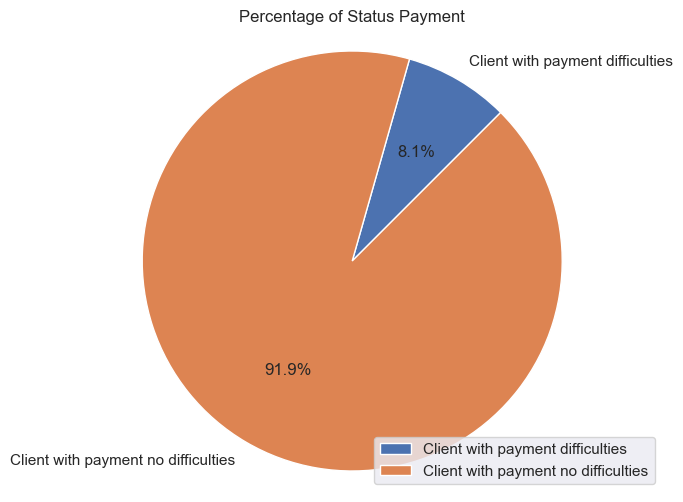

In [21]:
# Visualisasi dengan pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_percentage['Percentage (%)'], labels=status_percentage.index, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.title('Percentage of Status Payment')
plt.legend(loc='lower right')  # Menampilkan legenda
plt.show()

Klien dengan kesulitan pembayaran (8.1%): Persentase ini menunjukkan bahwa sebagian kecil pelanggan Home Credit, sekitar 8.1%, memiliki profil risiko yang lebih tinggi dalam hal pembayaran pinjaman. Kelompok ini mencakup klien yang menghadapi keterlambatan pembayaran atau kesulitan dalam memenuhi kewajiban pembayaran mereka.

Klien tanpa kesulitan pembayaran (91.9%): Persentase ini menunjukkan bahwa mayoritas pelanggan Home Credit, sekitar 91.9%, memiliki profil risiko yang lebih rendah dalam hal pembayaran pinjaman. Kelompok ini terdiri dari pelanggan yang melakukan pembayaran tepat waktu pada semua angsuran pinjaman mereka dan memiliki riwayat pembayaran yang baik.

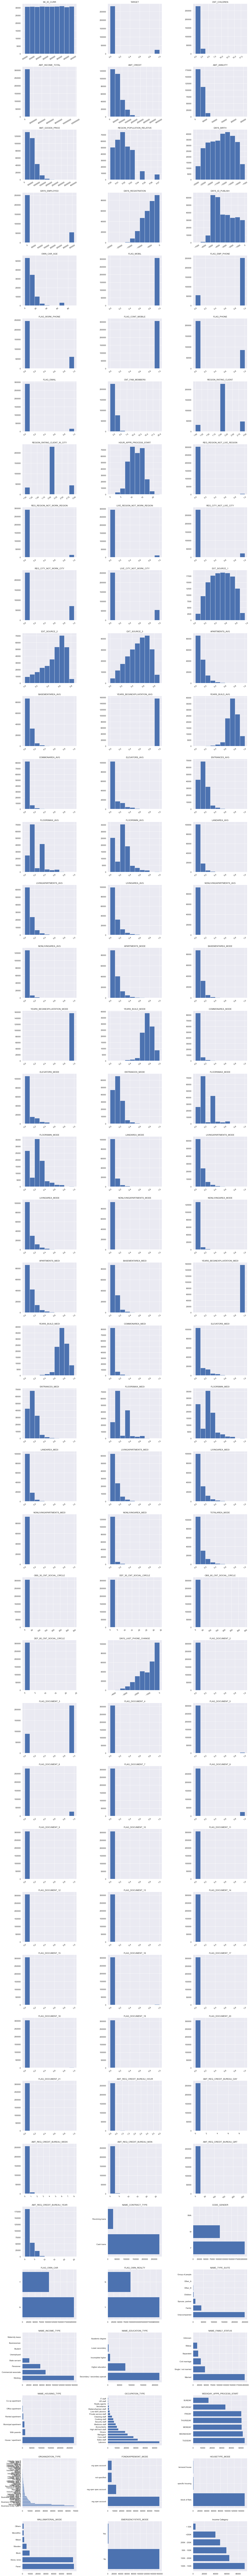

In [22]:
#visualisasi
visualize_data(app_train, int_float_cols, object_cols + ['Income Category'])


Mayoritas client Home Credit adalah perempuan dengan pinjaman tunai. Mereka umumnya tidak memiliki mobil tetapi memiliki properti (rumah atau apartemen). Pendapatan utama client berasal dari pekerjaan, dengan tingkat pendidikan menengah. Mayoritas client menikah dan tinggal di rumah atau apartemen. Meskipun informasi pekerjaan tidak tersedia untuk sebagian besar client, dari yang tersedia, mayoritas adalah pekerja kasar.

Rata-rata usia client Home Credit adalah 44 tahun dengan rentang usia 20-69 tahun. Pendapatan total rata-rata client adalah sekitar 168.797 dengan variasi yang signifikan. Jumlah kredit yang diajukan rata-rata adalah 599.026 dengan jumlah kredit maksimum mencapai 4.050.000. Mayoritas client tidak memiliki anak, namun terdapat beberapa yang memiliki hingga 19 anak.

Rata-rata angsuran per bulan yang harus dibayarkan oleh client adalah sekitar 27.108. Mayoritas client memiliki mobil dengan usia rata-rata mobil sekitar 12 tahun. Sekitar 82% client memiliki telepon di tempat kerja, sementara hanya sekitar 6% yang memiliki alamat email yang terdaftar.

Rata-rata jumlah anggota keluarga client adalah 2 orang dengan variasi yang signifikan. Hal ini menunjukkan bahwa mayoritas client Home Credit adalah individu atau pasangan tanpa anak.

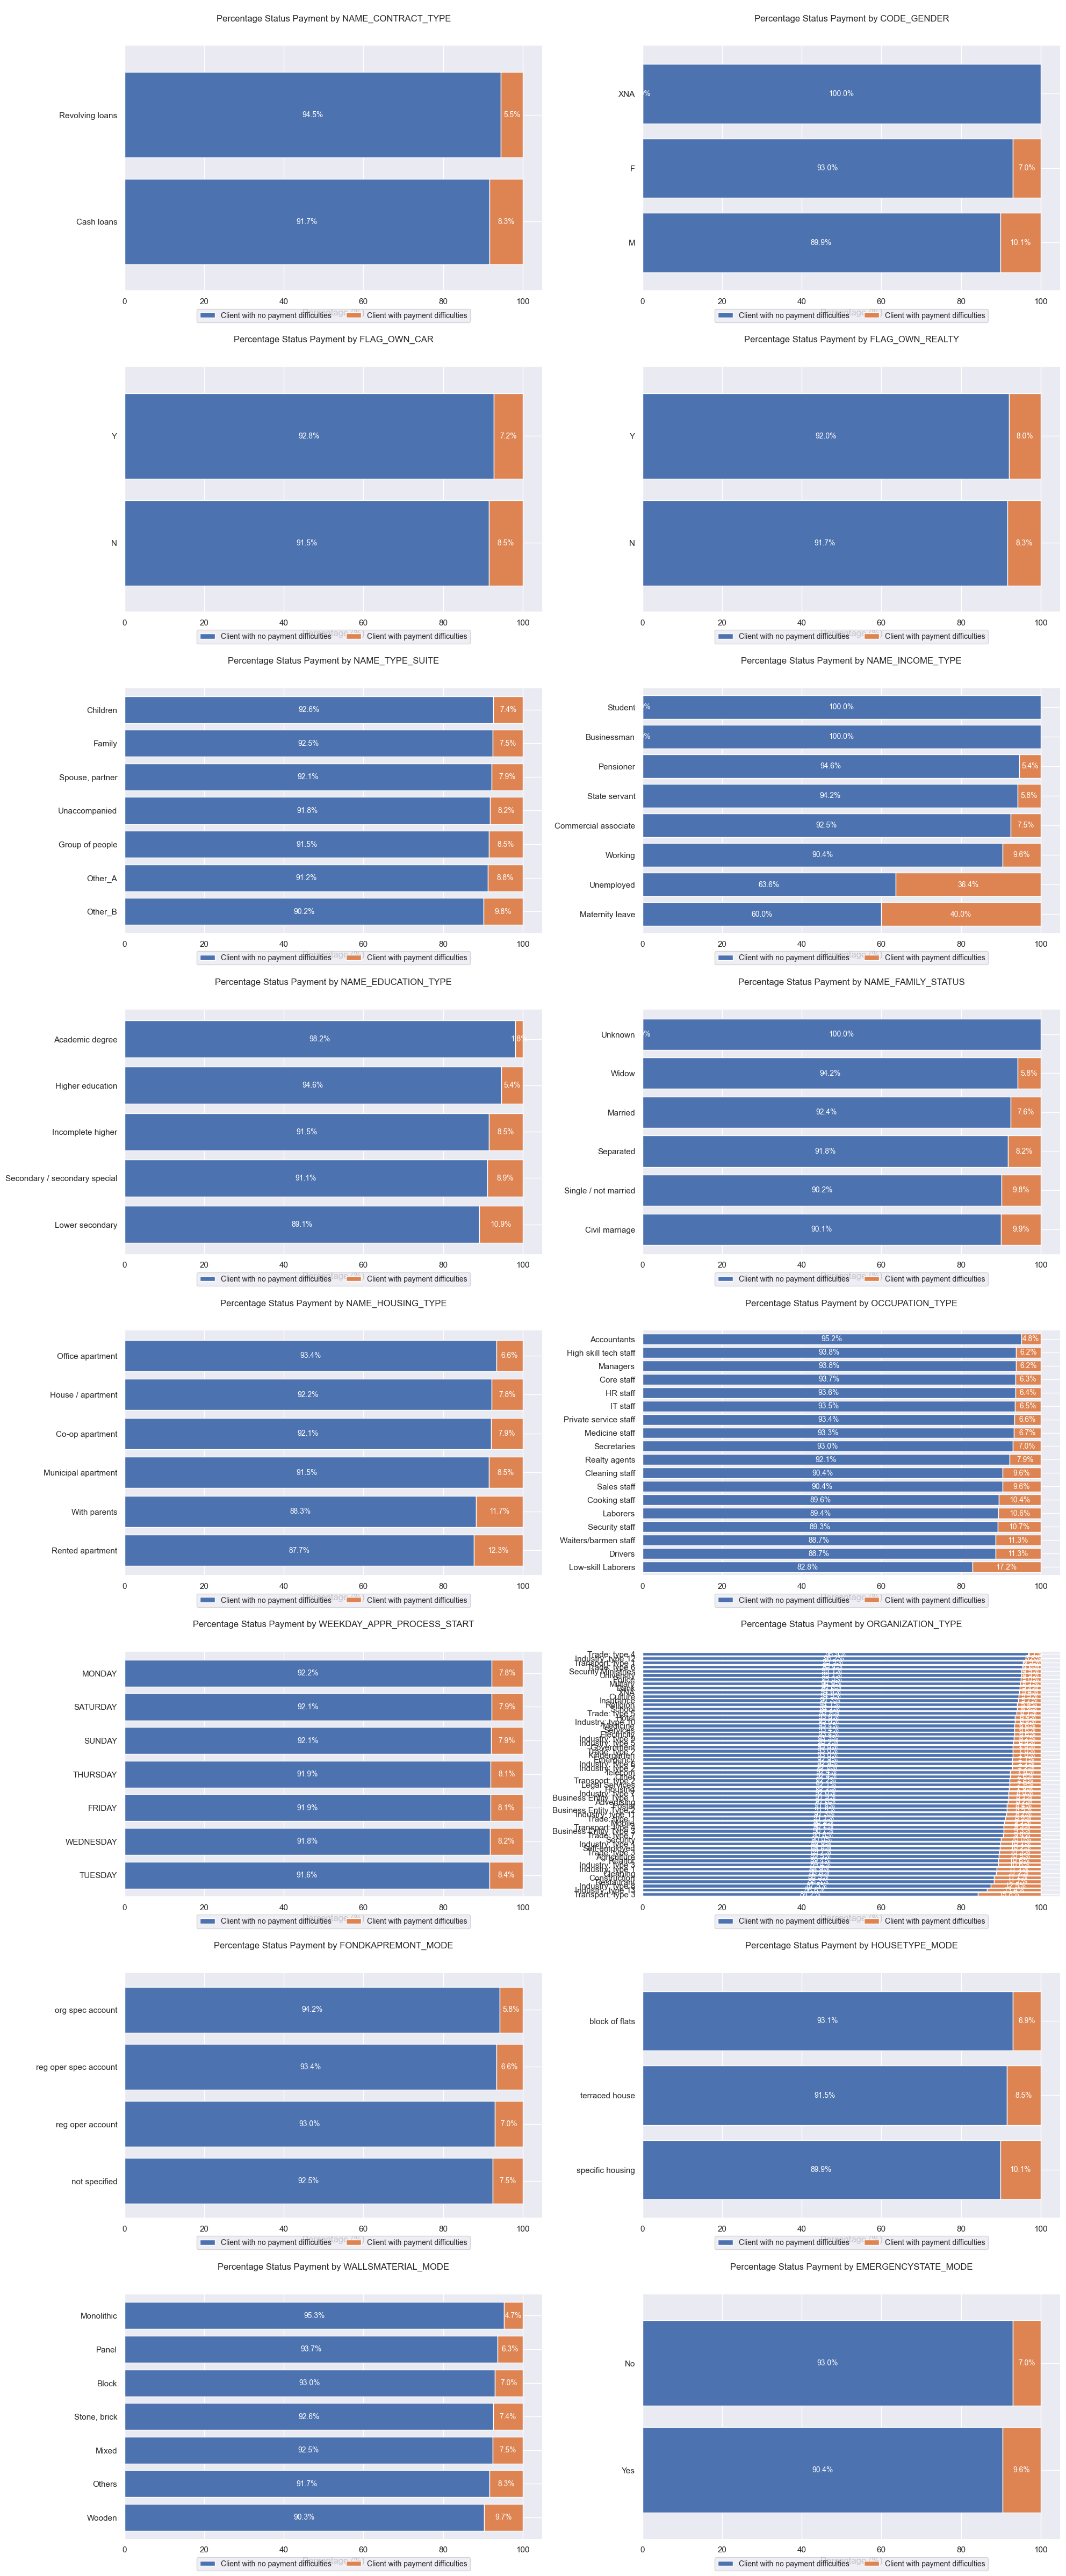

In [23]:
plot_categorical_variable(app_train, object_cols)

## 5. Feature Engineering

Feature engineering merupakan proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.) dan proses lainnya.

### Split Data

In [24]:
# Split ditampung ke variabel X & y
X = app_train.drop(['SK_ID_CURR', 'TARGET', 'Income Category'], axis=1)
y = app_train['TARGET']

print('Jumlah data yang digunakan {} baris dan {} kolom'.format(X.shape[0],X.shape[1]))

Jumlah data yang digunakan 307511 baris dan 120 kolom


In [25]:
# Splitting data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10,
                                                    stratify=y)

print("Jumlah data X_train:", len(X_train))
print("Jumlah data X_test:", len(X_test))

Jumlah data X_train: 230633
Jumlah data X_test: 76878


In [26]:
#reset index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### Handling Cardinality

Pada tahap ini akan dilakukan pengurangan jumlah unik katgorikal, Cardinality dapat mempengaruhi performa model machine learning. Variabel dengan cardinality tinggi cenderung menghasilkan fitur dengan jumlah dimensi yang besar, yang dapat meningkatkan kompleksitas model dan mengakibatkan overfitting. Sebaliknya, variabel dengan cardinality rendah cenderung lebih mudah untuk dikelola dan memberikan kontribusi yang lebih signifikan dalam memprediksi target.

In [27]:
def check_cardinality(df, columns):
    """
    Function to check the cardinality of categorical columns in a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.
        columns (list): List of column names to check the cardinality.

    Returns:
        cardinality_dict (dict): Dictionary containing the column names as keys and their corresponding cardinality as values.
    """
    cardinality_dict = {}
    for col in columns:
        unique_values = df[col].nunique()
        cardinality_dict[col] = unique_values
    return cardinality_dict

# Check Cardinality
cardinality = check_cardinality(X_train, object_cols)
cardinality

{'NAME_CONTRACT_TYPE': 2,
 'CODE_GENDER': 3,
 'FLAG_OWN_CAR': 2,
 'FLAG_OWN_REALTY': 2,
 'NAME_TYPE_SUITE': 7,
 'NAME_INCOME_TYPE': 8,
 'NAME_EDUCATION_TYPE': 5,
 'NAME_FAMILY_STATUS': 6,
 'NAME_HOUSING_TYPE': 6,
 'OCCUPATION_TYPE': 18,
 'WEEKDAY_APPR_PROCESS_START': 7,
 'ORGANIZATION_TYPE': 58,
 'FONDKAPREMONT_MODE': 4,
 'HOUSETYPE_MODE': 3,
 'WALLSMATERIAL_MODE': 7,
 'EMERGENCYSTATE_MODE': 2}

In [28]:
X_train['CODE_GENDER'].value_counts()

F      151802
M       78828
XNA         3
Name: CODE_GENDER, dtype: int64

In [29]:
X_train = X_train[X_train['CODE_GENDER'] != 'XNA']
X_test = X_test[X_test['CODE_GENDER'] != 'XNA']

In [30]:
X_train['NAME_FAMILY_STATUS'].value_counts()

Married                 147540
Single / not married     34080
Civil marriage           22236
Separated                14826
Widow                    11946
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [31]:
X_train = X_train[X_train['CODE_GENDER'] != 'Unknown']
X_test = X_test[X_test['CODE_GENDER'] != 'Unknown']

In [32]:
# Membuat dictionary dengan kategori pekerjaan yang sama
org = {
    'XNA': 'Unknown',
    'Self-employed': 'Self-employed',
    'Trade: type 7': 'Trade',
    'Other': 'Other',
    'Business Entity Type 2': 'Business Entity',
    'Medicine': 'Healthcare',
    'Business Entity Type 3': 'Business Entity',
    'Industry: type 3': 'Industry',
    'Industry: type 4': 'Industry',
    'Transport: type 4': 'Transport',
    'Construction': 'Construction',
    'Insurance': 'Insurance',
    'Kindergarten': 'Education',
    'School': 'Education',
    'Transport: type 2': 'Transport',
    'Housing': 'Housing',
    'Security': 'Security',
    'Business Entity Type 1': 'Business Entity',
    'Industry: type 10': 'Industry',
    'Government': 'Government',
    'Military': 'Military',
    'Industry: type 9': 'Industry',
    'Police': 'Police',
    'Agriculture': 'Agriculture',
    'Transport: type 3': 'Transport',
    'Industry: type 11': 'Industry',
    'University': 'Education',
    'Bank': 'Banking',
    'Trade: type 3': 'Trade',
    'Telecom': 'Telecommunications',
    'Industry: type 7': 'Industry',
    'Services': 'Services',
    'Electricity': 'Utilities',
    'Security Ministries': 'Security',
    'Culture': 'Culture',
    'Trade: type 1': 'Trade',
    'Postal': 'Postal Services',
    'Advertising': 'Advertising',
    'Emergency': 'Emergency',
    'Restaurant': 'Restaurant',
    'Trade: type 6': 'Trade',
    'Mobile': 'Telecommunications',
    'Realtor': 'Real Estate',
    'Trade: type 2': 'Trade',
    'Industry: type 2': 'Industry',
    'Legal Services': 'Legal Services',
    'Trade: type 5': 'Trade',
    'Transport: type 1': 'Transport',
    'Industry: type 1': 'Industry',
    'Trade: type 4': 'Trade',
    'Industry: type 5': 'Industry',
    'Religion': 'Religion',
    'Hotel': 'Hospitality',
    'Industry: type 6': 'Industry',
    'Cleaning': 'Services',
    'Industry: type 13': 'Industry',
    'Industry: type 12': 'Industry',
    'Industry: type 8': 'Industry'
}

# Mengganti kategori pekerjaan dengan kategori yang baru
X_train['ORGANIZATION_TYPE'] = X_train['ORGANIZATION_TYPE'].replace(org)
X_test['ORGANIZATION_TYPE'] = X_test['ORGANIZATION_TYPE'].replace(org)

### Handling Outlier

Pada tahap ini hanya memeriksa nilai yang sangat anomali, outlier dihandling menggunakan Transformasi Nilai.

In [33]:
(X_train[numerics].quantile([0,0.1,0.5,0.75,0.8,0.9,0.95,0.99,1])).T

,0.0,0.1,0.5,0.8,0.8,0.9,0.9,1.0,1.0
AMT_INCOME_TOTAL,25650.0,81000.0,144000.0,202500.0,225000.0,270000.0,337500.0,472500.0,117000000.0
AMT_CREDIT,45000.0,180000.0,513531.0,808650.0,900000.0,1133748.0,1350000.0,1850059.1,4050000.0
AMT_ANNUITY,1615.5,11097.0,24907.5,34596.0,37557.0,45954.0,53325.0,69903.0,258025.5
AMT_GOODS_PRICE,45000.0,180000.0,450000.0,679500.0,819000.0,1093500.0,1305000.0,1800000.0,4050000.0
DAYS_REGISTRATION,-24672.0,-9934.0,-4501.0,-1997.0,-1485.0,-690.0,-331.0,-50.0,0.0
OWN_CAR_AGE,0.0,2.0,9.0,15.0,17.0,22.0,30.0,64.0,91.0
OBS_30_CNT_SOCIAL_CIRCLE,0.0,0.0,0.0,2.0,3.0,4.0,6.0,10.0,348.0
DEF_30_CNT_SOCIAL_CIRCLE,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0
OBS_60_CNT_SOCIAL_CIRCLE,0.0,0.0,0.0,2.0,3.0,4.0,6.0,10.0,344.0
DEF_60_CNT_SOCIAL_CIRCLE,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,24.0


In [34]:
X_train = X_train[X_train['AMT_INCOME_TOTAL'] <= 495000.0]
X_test = X_test[X_test['AMT_INCOME_TOTAL'] <= 495000.0]

X_train['DAYS_EMPLOYED'] = X_train['DAYS_EMPLOYED'].replace(365243.0, np.nan)
X_test['DAYS_EMPLOYED'] = X_test['DAYS_EMPLOYED'].replace(365243.0, np.nan)


In [35]:
def check_skewness_kurtosis(data):
    skewness = data.skew()
    kurtosis = data.kurtosis()
    return skewness, kurtosis

In [36]:
skewness, kurtosis = check_skewness_kurtosis(X_train[numerics + have_scaling])
print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Skewness:
AMT_INCOME_TOTAL                 1.2
AMT_CREDIT                       1.2
AMT_ANNUITY                      1.3
AMT_GOODS_PRICE                  1.3
DAYS_REGISTRATION               -0.6
OWN_CAR_AGE                      2.7
OBS_30_CNT_SOCIAL_CIRCLE        14.9
DEF_30_CNT_SOCIAL_CIRCLE         5.6
OBS_60_CNT_SOCIAL_CIRCLE        14.8
DEF_60_CNT_SOCIAL_CIRCLE         5.6
DAYS_LAST_PHONE_CHANGE          -0.7
DAYS_BIRTH                      -0.1
DAYS_EMPLOYED                   -2.0
DAYS_ID_PUBLISH                  0.3
AMT_REQ_CREDIT_BUREAU_HOUR      14.5
AMT_REQ_CREDIT_BUREAU_DAY       28.1
AMT_REQ_CREDIT_BUREAU_WEEK       9.2
AMT_REQ_CREDIT_BUREAU_MON        7.8
AMT_REQ_CREDIT_BUREAU_QRT      147.9
AMT_REQ_CREDIT_BUREAU_YEAR       1.2
CNT_CHILDREN                     2.0
HOUR_APPR_PROCESS_START         -0.0
CNT_FAM_MEMBERS                  1.0
REGION_POPULATION_RELATIVE       1.5
EXT_SOURCE_2                    -0.8
EXT_SOURCE_3                    -0.4
APARTMENTS_AVG              

Hampir semua memiliki nilai skewness > 1 & > -1 menunjukan data tidak terdistribusi normal.

### Handling Missing Values

Dalam menangani missing data, terdapat dua fitur yang akan diambil tindakan. Pertama, fitur properti akan diisi dengan nilai median untuk yang memiliki properti dan 0 untuk yang tidak memiliki properti. Kedua, fitur OWN_CAR_AGE akan diisi dengan nilai 0.

Dengan menggunakan pendekatan ini, kita dapat memperbaiki kekurangan data dengan mengisi nilai yang tepat. Dalam kasus fitur properti, mengisi dengan nilai median memungkinkan kita mempertahankan informasi properti yang penting, sementara dalam fitur OWN_CAR_AGE, mengisi dengan nilai 0 memberikan informasi yang jelas bahwa klien tidak memiliki mobil.

In [37]:
#melihat persentase data missing values
null = X_train.isnull().sum()/len(X_train)*100
null = null.sort_values(ascending=False).round(2)
print('Persentase Missing Values :\n', null.round(2))
print('')

Persentase Missing Values :
 COMMONAREA_MODE                70.0
COMMONAREA_AVG                 70.0
COMMONAREA_MEDI                70.0
NONLIVINGAPARTMENTS_AVG        69.6
NONLIVINGAPARTMENTS_MODE       69.6
NONLIVINGAPARTMENTS_MEDI       69.6
FONDKAPREMONT_MODE             68.5
LIVINGAPARTMENTS_AVG           68.5
LIVINGAPARTMENTS_MEDI          68.5
LIVINGAPARTMENTS_MODE          68.5
FLOORSMIN_MODE                 68.0
FLOORSMIN_AVG                  68.0
FLOORSMIN_MEDI                 68.0
YEARS_BUILD_MEDI               66.7
YEARS_BUILD_AVG                66.7
YEARS_BUILD_MODE               66.7
OWN_CAR_AGE                    66.2
LANDAREA_MODE                  59.5
LANDAREA_MEDI                  59.5
LANDAREA_AVG                   59.5
BASEMENTAREA_AVG               58.7
BASEMENTAREA_MEDI              58.7
BASEMENTAREA_MODE              58.7
EXT_SOURCE_1                   56.4
NONLIVINGAREA_MEDI             55.3
NONLIVINGAREA_MODE             55.3
NONLIVINGAREA_AVG              55.3

In [38]:
# Mengisi nilai yang hilang dengan median jika FLAG_OWN_REALTY = Y
X_train.loc[X_train['FLAG_OWN_REALTY'] == 'Y', 
            property_miss] = X_train.loc[X_train['FLAG_OWN_REALTY'] == 'Y', 
            property_miss].fillna(X_train.loc[X_train['FLAG_OWN_REALTY'] == 'Y', 
            property_miss].median())

X_test.loc[X_test['FLAG_OWN_REALTY'] == 'Y', 
            property_miss] = X_test.loc[X_test['FLAG_OWN_REALTY'] == 'Y', 
            property_miss].fillna(X_test.loc[X_test['FLAG_OWN_REALTY'] == 'Y', 
            property_miss].median())

# Mengisi nilai yang hilang dengan 0 jika FLAG_OWN_REALTY = N
X_train.loc[X_train['FLAG_OWN_REALTY'] == 'N', 
            property_miss] = X_train.loc[X_train['FLAG_OWN_REALTY'] == 'N', 
            property_miss].fillna(0)

X_test.loc[X_test['FLAG_OWN_REALTY'] == 'N', 
            property_miss] = X_test.loc[X_test['FLAG_OWN_REALTY'] == 'N', 
            property_miss].fillna(0)

In [39]:
X_train["OWN_CAR_AGE"] = X_train["OWN_CAR_AGE"].fillna(0)
X_test["OWN_CAR_AGE"] = X_test["OWN_CAR_AGE"].fillna(0)

In [40]:
columns_to_fill = ['OCCUPATION_TYPE', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'FONDKAPREMONT_MODE']

X_train[columns_to_fill] = X_train[columns_to_fill].fillna('Unknown')
X_test[columns_to_fill] = X_test[columns_to_fill].fillna('Unknown')

In [41]:
X_train = X_train.drop('EXT_SOURCE_1', axis=1)
X_test = X_test.drop('EXT_SOURCE_1', axis=1)

In [42]:
#melihat persentase data missing values
null = X_train.isnull().sum()/len(X_train)*100
null = null.sort_values(ascending=False).round(2)
print('Persentase Missing Values :\n', null.round(2))
print('')

Persentase Missing Values :
 EXT_SOURCE_3                   19.8
DAYS_EMPLOYED                  18.1
AMT_REQ_CREDIT_BUREAU_DAY      13.5
AMT_REQ_CREDIT_BUREAU_HOUR     13.5
AMT_REQ_CREDIT_BUREAU_YEAR     13.5
AMT_REQ_CREDIT_BUREAU_WEEK     13.5
AMT_REQ_CREDIT_BUREAU_MON      13.5
AMT_REQ_CREDIT_BUREAU_QRT      13.5
NAME_TYPE_SUITE                 0.4
OBS_30_CNT_SOCIAL_CIRCLE        0.3
DEF_30_CNT_SOCIAL_CIRCLE        0.3
OBS_60_CNT_SOCIAL_CIRCLE        0.3
DEF_60_CNT_SOCIAL_CIRCLE        0.3
EXT_SOURCE_2                    0.2
AMT_GOODS_PRICE                 0.1
AMT_ANNUITY                     0.0
CNT_FAM_MEMBERS                 0.0
DAYS_LAST_PHONE_CHANGE          0.0
FONDKAPREMONT_MODE              0.0
HOUSETYPE_MODE                  0.0
NONLIVINGAREA_MEDI              0.0
NONLIVINGAPARTMENTS_MEDI        0.0
LIVINGAPARTMENTS_MEDI           0.0
TOTALAREA_MODE                  0.0
LIVINGAREA_MEDI                 0.0
FLOORSMAX_MEDI                  0.0
LANDAREA_MEDI                   0.0

In [43]:
# Menghapus baris dengan nilai kosong (NaN)
X_train = X_train.dropna()
X_test = X_test.dropna()

In [44]:
print("Jumlah data X_train:", len(X_train))
print("Jumlah data X_test:", len(X_test))

Jumlah data X_train: 148760
Jumlah data X_test: 49489


In [45]:
# Menyaring y_train berdasarkan indeks yang ada dalam X_train
y_train = y_train.loc[X_train.index]

# Menyaring y_test berdasarkan indeks yang ada dalam X_test
y_test = y_test.loc[X_test.index]


In [46]:
#reset index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [47]:
y_train.value_counts()

0    136312
1     12448
Name: TARGET, dtype: int64

In [48]:
# Mengambil indeks kolom yang termasuk dalam kategori 'nominals' dan 'ordinals'
nominal_indexes = [X_train.columns.get_loc(col) for col in nominals if col in X_train.columns]
ordinal_indexes = [X_train.columns.get_loc(col) for col in ordinals if col in X_train.columns]

# Menggabungkan indeks kolom
desired_indexes = nominal_indexes + ordinal_indexes
desired_indexes

[0, 1, 2, 9, 10, 12, 13, 26, 38, 83, 84, 86, 87, 3, 30, 11]

### Data balancing

In [49]:
# Menghitung jumlah sampel untuk kelas 0 dan kelas 1
count_class_0 = 136312
count_class_1 = 12448

# Menghitung jumlah sampel yang diinginkan setelah pembagian kelas 0
count_class_0_divided = count_class_0 // 3
count_class_1_adjusted = count_class_1

# Menghitung sampling strategy setelah pembagian kelas 0
sampling_strategy = {0: count_class_0_divided, 1: count_class_1_adjusted}

# Inisialisasi objek RandomUnderSampler dan SMOTENC dengan sampling_strategy
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
smotenc = SMOTENC(categorical_features=desired_indexes, sampling_strategy=1, random_state=42)

# Menggabungkan kedua objek dalam pipeline
pipeline = Pipeline([('under', rus), ('over', smotenc)])

# Melakukan resampling pada X_train dan y_train
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)


### Scalling & Encoding

Pada preproses digunakan beberapa library scikit-learn untuk melakukan preprocessing data sebelum melakukan pemodelan.

- PowerTransformer: Fungsi ini digunakan untuk melakukan transformasi data yang memiliki skewness atau kemiringan yang signifikan. Dalam contoh ini, metode yang digunakan adalah 'yeo-johnson'.

- RobustScaler: Fungsi ini digunakan untuk melakukan scaling data dengan mempertahankan resistansi terhadap outlier. Skala data akan disesuaikan berdasarkan interquartile range (IQR).

- OrdinalEncoder: Fungsi ini digunakan untuk melakukan encoding terhadap fitur dengan tipe data ordinal. Nilai-nilai ordinal akan diubah menjadi angka sesuai dengan urutan kategori yang ditentukan.

- OneHotEncoder: Fungsi ini digunakan untuk melakukan encoding terhadap fitur dengan tipe data nominal. Setiap kategori akan diubah menjadi vektor biner dengan nilai 1 untuk kategori yang ada dan nilai 0 untuk kategori yang tidak ada.

- ColumnTransformer: Fungsi ini digunakan untuk menggabungkan beberapa transformer dalam satu proses. Setiap transformer akan diterapkan pada kolom yang sesuai berdasarkan spesifikasi yang ditentukan.

Dengan menggunakan fungsi-fungsi di atas, kita dapat melakukan preprocessing data dengan efisien dan konsisten sebelum melakukan pemodelan

In [50]:
# Scaling skew columns
skew_pipe = Pipeline([
    ('sk_', PowerTransformer(method='yeo-johnson')),
    ('rb_', RobustScaler())
])

# Ordinal Encoding
ordinal_en = Pipeline([
    ('en_', OrdinalEncoder(categories=[['Lower secondary', 
                                        'Secondary / secondary special',
                                        'Incomplete higher', 
                                        'Higher education', 
                                        'Academic degree']]))
])

# One-hot Encoding
nominal_en = Pipeline([
    ('en_', OneHotEncoder(sparse_output=False, drop=None))
])

# Preprocessor 
Preprocessor = ColumnTransformer(
    transformers=[
        ('sc', skew_pipe, numerics),
        ('or', ordinal_en, ordinals),
        ('nom', nominal_en, nominals),
        ('n_sc', 'passthrough', have_scaling),
        ('n_en', 'passthrough', have_enc)
    ]
)


In [51]:
Preprocessor

ColumnTransformer(transformers=[('sc',
                                 Pipeline(steps=[('sk_', PowerTransformer()),
                                                 ('rb_', RobustScaler())]),
                                 ['AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                  'DAYS_REGISTRATION', 'OWN_CAR_AGE',
                                  'OBS_30_CNT_SOCIAL_CIRCLE',
                                  'DEF_30_CNT_SOCIAL_CIRCLE',
                                  'OBS_60_CNT_SOCIAL_CIRCLE',
                                  'DEF_60_CNT_SOCIAL_CIRCLE',
                                  'DAYS_LAST_PHONE_CHANGE', 'DAYS_BIRTH'...
                                  'REG_CITY_NOT_WORK_CITY',
                                  'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
                                  'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
                                  'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                                  'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                                  'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
                                  'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                                  'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                                  'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                                  'FLAG_DOCUMENT_17', ...])])

In [52]:
# Fit and transform pada X_train, X_test
X_train = Preprocessor.fit_transform(X_train_resampled)
X_test = Preprocessor.transform(X_test)


# Get the column names after transformation
transformed_columns = Preprocessor.get_feature_names_out()

# Convert the transformed data to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=transformed_columns)
X_test_df = pd.DataFrame(X_test, columns=transformed_columns)


In [53]:
y_train_resampled.value_counts()

0    45437
1    45437
Name: TARGET, dtype: int64

## 7. Model Definition

In [54]:
hgbc = HistGradientBoostingClassifier(random_state=10)
xgb = xgb.XGBClassifier()

## 8. Model Training

HistGradientBoostingClassifier memiliki beberapa argumen dan parameter yang dapat dikonfigurasi, seperti random_state yang digunakan untuk mengatur seed atau nilai acak yang digunakan oleh model. Dengan menentukan random_state, kita dapat memastikan hasil yang sama dari model jika kita menjalankannya dengan konfigurasi yang sama.

Selain itu, dalam kode yang diberikan, juga digunakan model XGBClassifier dari library XGBoost. Model ini juga merupakan model yang termasuk dalam keluarga Gradient Boosting dan digunakan untuk masalah klasifikasi. XGBoost memiliki fitur-fitur yang kuat seperti penanganan missing values, regularisasi, dan kemampuan untuk menangani data dengan skala yang berbeda-beda.

Kedua model ini, HistGradientBoostingClassifier dan XGBClassifier, digunakan untuk prediksi pada masalah Home Credit. Model-model ini dapat digunakan untuk mempelajari pola-pola dari data historis Home Credit dan melakukan prediksi terhadap calon pemohon kredit, dengan tujuan untuk mengklasifikasikan apakah pemohon kredit akan membayar atau tidak membayar kredit tersebut.

In [55]:
hgbc.fit(X_train_df, y_train_resampled)

HistGradientBoostingClassifier(random_state=10)

In [56]:
xgb.fit(X_train_df, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## 9. Model Evaluation

### Hist Gradient Boosting Classifier

F1 Score - Train Set  :  0.8690521780756342 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     45437
           1       0.95      0.80      0.87     45437

    accuracy                           0.88     90874
   macro avg       0.89      0.88      0.88     90874
weighted avg       0.89      0.88      0.88     90874
 

Confusion Matrix      : 

AUC (HistGradientBoostingClassifier): 0.7038574195298308


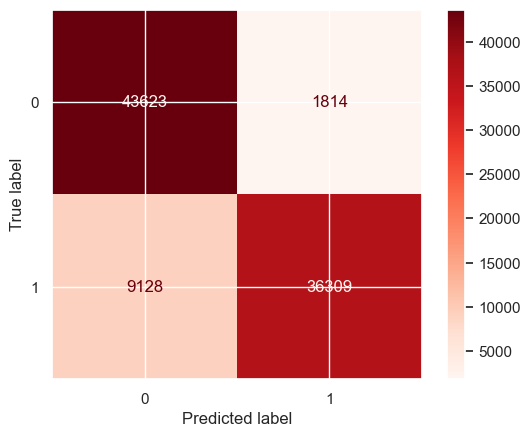

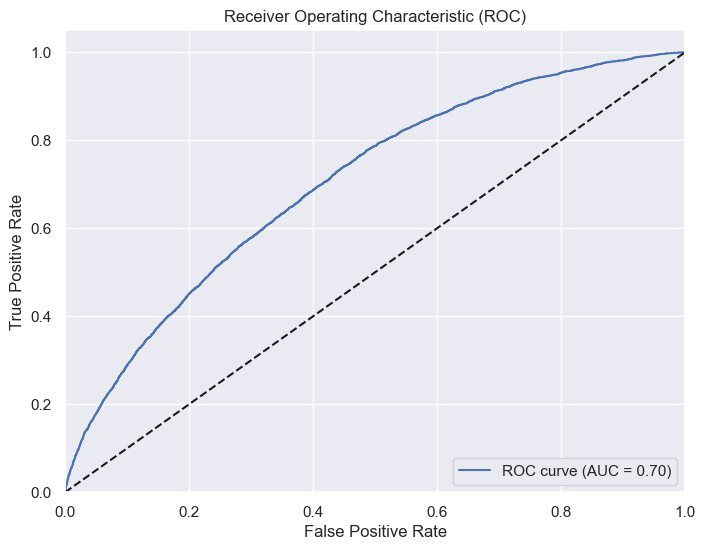

In [57]:
# Check Performance Model against Train-Set
y_pred_train = hgbc.predict(X_train_df)

print('F1 Score - Train Set  : ', f1_score(y_train_resampled, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_resampled, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(hgbc, X_train_df, y_train_resampled, cmap='Reds'))

y_pred_hist_gb = hgbc.predict_proba(X_test_df)[:, 1]
auc_hist_gb = roc_auc_score(y_test, y_pred_hist_gb)

print("\nAUC (HistGradientBoostingClassifier):", auc_hist_gb)

# Menghitung nilai AUC-ROC
auc_score = roc_auc_score(y_test, y_pred_hist_gb)

# Menghitung false positive rate (FPR) dan true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_hist_gb)

# Membuat plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Garis referensi: ROC acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### XGBoost

F1 Score - Train Set  :  0.8937180380531705 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     45437
           1       0.96      0.83      0.89     45437

    accuracy                           0.90     90874
   macro avg       0.91      0.90      0.90     90874
weighted avg       0.91      0.90      0.90     90874
 

Confusion Matrix      : 

AUC (XGBoost): 0.6955379798672274


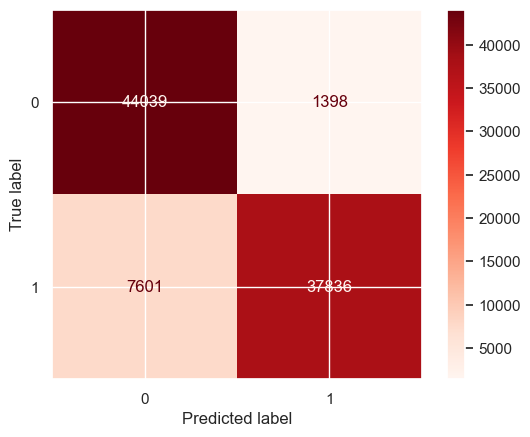

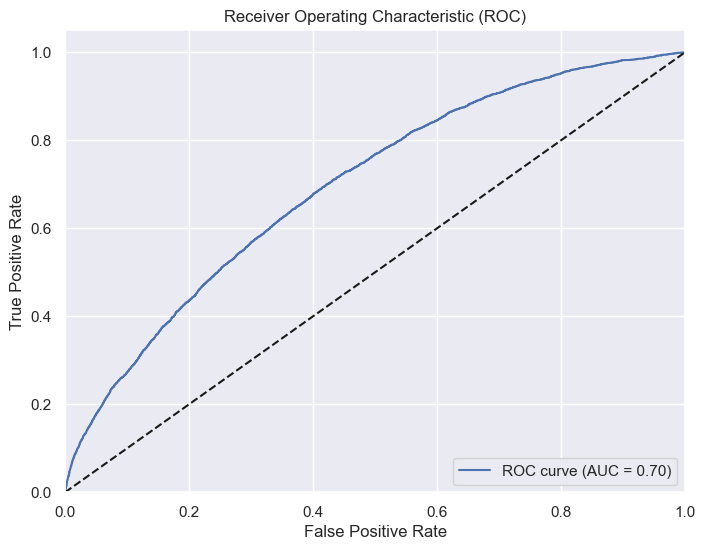

In [58]:
y_pred_train = xgb.predict(X_train_df)

print('F1 Score - Train Set  : ', f1_score(y_train_resampled, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_resampled, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb, X_train_df, y_train_resampled, cmap='Reds'))
y_pred_xgb = xgb.predict_proba(X_test_df)[:, 1]
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("\nAUC (XGBoost):", auc_xgb)

# Menghitung nilai AUC-ROC
auc_score = roc_auc_score(y_test, y_pred_xgb)

# Menghitung false positive rate (FPR) dan true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Membuat plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Garis referensi: ROC acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 10. Conclusion

### EDA

Berdasarkan analisis terhadap berbagai faktor yang mempengaruhi perilaku pelanggan dalam membayar pinjaman, beberapa kesimpulan dapat diambil. Pertama, pelanggan dengan pendapatan total yang rendah, jumlah kredit yang kecil, harga barang yang terbatas, dan anuitas pinjaman yang rendah cenderung mengalami kesulitan dalam membayar pinjaman. Keluarga dengan jumlah anggota yang sedikit, usia pelanggan muda, dan status baru mendapatkan pekerjaan juga dapat menghadapi kesulitan dalam pembayaran.

Selanjutnya, jenis kontrak pinjaman (cash loans), kepemilikan real estate tanpa keinginan memiliki mobil, dan status perkawinan juga berpotensi menjadi faktor yang sulit membayar pinjaman. Tipe penghuni yang tidak didampingi (unaccompanied) dan pendidikan menengah khusus (secondary special) juga dapat mempengaruhi perilaku pelanggan dalam membayar pinjaman.

Selain itu, sumber pendapatan dari pekerjaan (working), asosiasi komersial (commercial associate), dan pensiunan (pensioner) serta kepemilikan aset rumah atau apartemen dapat berhubungan dengan kesulitan pembayaran pinjaman. Tidak memiliki telepon kerja, tetapi memiliki telepon seluler dan rumah yang mudah dihubungi melalui telepon tanpa email juga dapat menjadi indikasi kesulitan dalam pembayaran pinjaman.

Faktor lain yang dapat mempengaruhi perilaku pelanggan adalah rating wilayah tinggal, alamat permanen dan alamat kontak yang sama, tipe hunian blok apartemen, dan bahan bangunan rumah. Pelanggan yang tidak menyediakan seluruh dokumen yang diperlukan juga dapat menghadapi kesulitan dalam membayar pinjaman.

Terakhir, jenis pekerjaan seperti buruh, staf inti, pengemudi, manajer, dan staf penjualan, serta jenis organisasi atau perusahaan tertentu (business entity type 3, XNA, dan self-employed) dapat berhubungan dengan kesulitan dalam pembayaran pinjaman.

Kesimpulannya, ada banyak faktor yang dapat mempengaruhi perilaku pelanggan dalam membayar pinjaman. Faktor-faktor seperti pendapatan rendah, jumlah kredit, harga barang, anuitas pinjaman, keluarga, status pekerjaan, kepemilikan aset, jenis kontrak pinjaman, tipe penghuni, pendidikan, status perkawinan, jenis rumah, dokumen yang disediakan, jenis pekerjaan, dan jenis organisasi/perusahaan semua dapat berkontribusi terhadap kesulitan pelanggan dalam membayar pinjaman.

### Model 
Dari kedua model yang telah digunakan, model XGboost merupakan model terbaik karena memiliki nilai ROC-AUC sekitar 70% dan akurasi 90%.

Model masih Under Fitting karena imbalance nya data pada kolom TARGET

### Implementasi Bisnis
Dalam implementasi bisnis, hasil AUC sebesar 70% menunjukkan bahwa model yang digunakan untuk prediksi dalam konteks Home Credit memiliki performa yang cukup baik. AUC (Area Under the Curve) adalah metrik evaluasi yang digunakan untuk mengukur sejauh mana model mampu membedakan antara kelas positif dan negatif. Semakin tinggi nilai AUC, semakin baik model dalam membedakan kedua kelas tersebut.

Dengan AUC sebesar 70%, model dapat memberikan prediksi yang relatif akurat dalam membedakan pemohon kredit yang berpotensi membayar atau tidak membayar kredit. Namun, penting untuk mempertimbangkan faktor lain dalam implementasi bisnis, seperti biaya dan risiko yang terkait dengan keputusan kredit.

Selain AUC, juga perlu memperhatikan akurasi sebagai metrik evaluasi tambahan. Akurasi mengukur sejauh mana model mampu mengklasifikasikan data dengan benar secara keseluruhan. Dalam implementasi bisnis, selain mencapai AUC yang tinggi, juga penting untuk memastikan tingkat akurasi yang memadai. Dengan begitu, keputusan kredit yang diambil berdasarkan prediksi model memiliki tingkat keberhasilan yang lebih tinggi dan dapat membantu dalam mengurangi risiko kredit yang tidak terbayarkan.

Oleh karena itu, dengan hasil AUC 70% dan perhatian terhadap akurasi, implementasi bisnis dapat mengandalkan model ini sebagai alat untuk membantu dalam pengambilan keputusan kredit yang lebih baik dan mengoptimalkan pengelolaan risiko kredit.
